## 데이터프레임 준비

In [102]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import koreanize_matplotlib

In [103]:
df_2019=pd.read_csv('sql_prep_2019.csv')
df_2020=pd.read_csv('sql_prep_2020.csv')
df_2021=pd.read_csv('sql_prep_2021.csv')
health_info=pd.read_csv('health_info.csv')

In [104]:
df_2019=pd.merge(df_2019,health_info, on='PIDWON', how='left')
df_2020=pd.merge(df_2020,health_info, on='PIDWON', how='left')
df_2021=pd.merge(df_2021,health_info, on='PIDWON', how='left')
df_2019=df_2019.iloc[:,:6]
df_2020=df_2020.iloc[:,:6]
df_2021=df_2021.iloc[:,:6]

In [105]:
df_2021.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9117 entries, 0 to 9116
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   PIDWON     9117 non-null   int64  
 1   MS_COUNT   9117 non-null   int64  
 2   CLAIM_SUM  9117 non-null   float64
 3   SEX        8554 non-null   float64
 4   AGE        8554 non-null   float64
 5   HLIT       7163 non-null   float64
dtypes: float64(4), int64(2)
memory usage: 427.5 KB


In [122]:
df_2019['MS_CLAIM_RATIO']=df_2019['CLAIM_SUM']/df_2019['MS_COUNT']
df_2020['MS_CLAIM_RATIO']=df_2020['CLAIM_SUM']/df_2020['MS_COUNT']
df_2021['MS_CLAIM_RATIO']=df_2021['CLAIM_SUM']/df_2021['MS_COUNT']

In [127]:
df_2019.to_csv('df_2019.csv', index=False, encoding='utf-8-sig')

## 1. 보험 청구 횟수 별 성별 분포

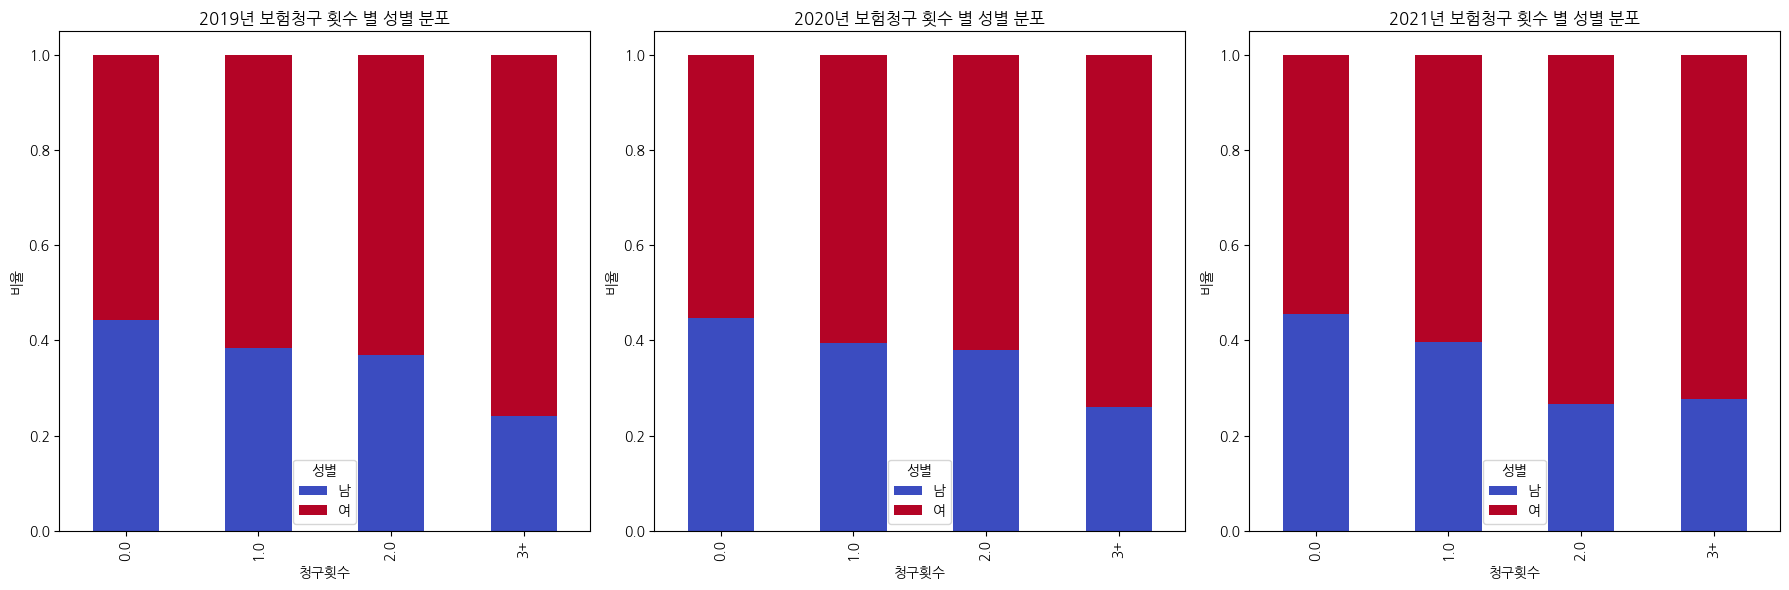

In [106]:
import matplotlib.pyplot as plt

# 2019년 데이터 준비 (성별)
sex_2019 = df_2019[['CLAIM_SUM', 'SEX']].copy()

# 2020년 데이터 준비 (성별)
sex_2020 = df_2020[['CLAIM_SUM', 'SEX']].copy()

# 2021년 데이터 준비 (성별)
sex_2021 = df_2021[['CLAIM_SUM', 'SEX']].copy()

# CLAIM_SUM이 3 이상인 경우 하나의 그룹으로 묶는 함수
def group_claim_sum(df):
    df['CLAIM_SUM'] = df['CLAIM_SUM'].apply(lambda x: '3+' if x >= 3 else str(x))
    return df

# 각 년도별 데이터에 적용
sex_2019 = group_claim_sum(sex_2019)
sex_2020 = group_claim_sum(sex_2020)
sex_2021 = group_claim_sum(sex_2021)

# 1행 3열로 서브플롯 설정
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# 2019년 성별 분포 (실제 값으로 나누어 bar chart)
sex_2019_grouped = sex_2019.groupby(['CLAIM_SUM', 'SEX']).size().unstack(fill_value=0)
sex_2019_grouped = sex_2019_grouped.div(sex_2019_grouped.sum(axis=1), axis=0)
sex_2019_grouped.plot(kind='bar', stacked=True, ax=axes[0], cmap='coolwarm')
axes[0].set_title('2019년 보험청구 횟수 별 성별 분포')
axes[0].set_xlabel('청구횟수')
axes[0].set_ylabel('비율')
axes[0].legend(title='성별', labels=['남','여'])

# 2020년 성별 분포 (실제 값으로 나누어 bar chart)
sex_2020_grouped = sex_2020.groupby(['CLAIM_SUM', 'SEX']).size().unstack(fill_value=0)
sex_2020_grouped = sex_2020_grouped.div(sex_2020_grouped.sum(axis=1), axis=0)
sex_2020_grouped.plot(kind='bar', stacked=True, ax=axes[1], cmap='coolwarm')
axes[1].set_title('2020년 보험청구 횟수 별 성별 분포')
axes[1].set_xlabel('청구횟수')
axes[1].set_ylabel('비율')
axes[1].legend(title='성별', labels=['남','여'])

# 2021년 성별 분포 (실제 값으로 나누어 bar chart)
sex_2021_grouped = sex_2021.groupby(['CLAIM_SUM', 'SEX']).size().unstack(fill_value=0)
sex_2021_grouped = sex_2021_grouped.div(sex_2021_grouped.sum(axis=1), axis=0)
sex_2021_grouped.plot(kind='bar', stacked=True, ax=axes[2], cmap='coolwarm')
axes[2].set_title('2021년 보험청구 횟수 별 성별 분포')
axes[2].set_xlabel('청구횟수')
axes[2].set_ylabel('비율')
axes[2].legend(title='성별', labels=['남','여'])

# 차트 표시
plt.tight_layout()
plt.show()


## 1-1. 성별 별 보험 청구 횟수 분포

/tmp/ipykernel_24/3381297392.py:35: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(['남성', '여성'])
/tmp/ipykernel_24/3381297392.py:45: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(['남성', '여성'])
/tmp/ipykernel_24/3381297392.py:55: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[2].set_xticklabels(['남성', '여성'])


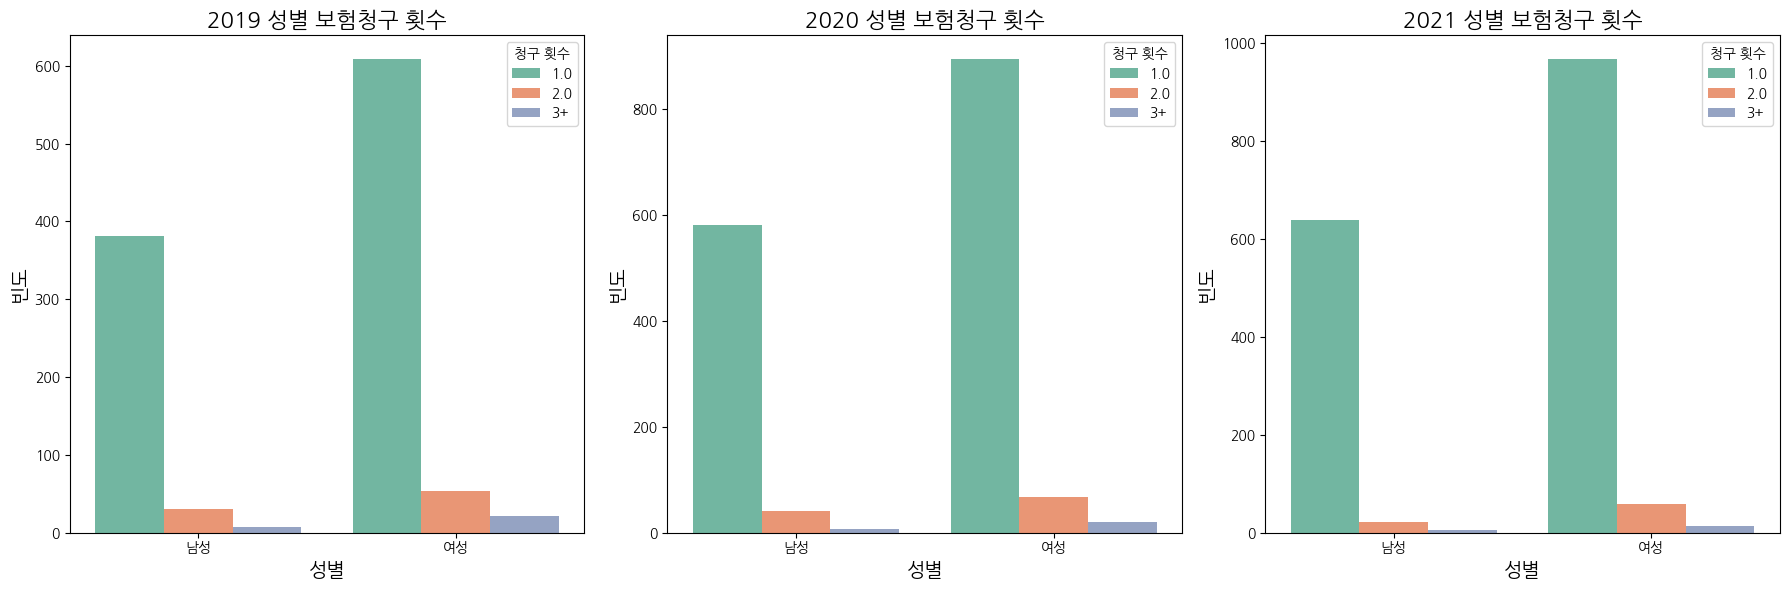

In [107]:
import matplotlib.pyplot as plt
import seaborn as sns

# 2019년, 2020년, 2021년 데이터 준비 (성별)
sex_2019 = df_2019[['CLAIM_SUM', 'SEX']].copy()
sex_2020 = df_2020[['CLAIM_SUM', 'SEX']].copy()
sex_2021 = df_2021[['CLAIM_SUM', 'SEX']].copy()

# CLAIM_SUM이 0인 경우 제거
sex_2019 = sex_2019[sex_2019['CLAIM_SUM'] != 0]
sex_2020 = sex_2020[sex_2020['CLAIM_SUM'] != 0]
sex_2021 = sex_2021[sex_2021['CLAIM_SUM'] != 0]

# CLAIM_SUM이 3 이상인 경우 하나의 그룹으로 묶는 함수
def group_claim_sum(df):
    df['CLAIM_SUM'] = df['CLAIM_SUM'].apply(lambda x: '3+' if x >= 3 else str(x))
    return df

# 각 년도별 데이터에 적용
sex_2019 = group_claim_sum(sex_2019)
sex_2020 = group_claim_sum(sex_2020)
sex_2021 = group_claim_sum(sex_2021)

# 1행 3열로 서브플롯 설정
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# 2019년 데이터
claim_counts_2019 = sex_2019.groupby(['SEX', 'CLAIM_SUM']).size().reset_index(name='COUNT')
sns.barplot(data=claim_counts_2019, x='SEX', y='COUNT', hue='CLAIM_SUM', palette='Set2', ax=axes[0])
axes[0].set_title('2019 성별 보험청구 횟수', fontsize=16)
axes[0].set_xlabel('성별', fontsize=14)
axes[0].set_ylabel('빈도', fontsize=14)
axes[0].legend(title='청구 횟수')
axes[0].tick_params(axis='x', rotation=0)
axes[0].set_xticklabels(['남성', '여성'])

# 2020년 데이터
claim_counts_2020 = sex_2020.groupby(['SEX', 'CLAIM_SUM']).size().reset_index(name='COUNT')
sns.barplot(data=claim_counts_2020, x='SEX', y='COUNT', hue='CLAIM_SUM', palette='Set2', ax=axes[1])
axes[1].set_title('2020 성별 보험청구 횟수', fontsize=16)
axes[1].set_xlabel('성별', fontsize=14)
axes[1].set_ylabel('빈도', fontsize=14)
axes[1].legend(title='청구 횟수')
axes[1].tick_params(axis='x', rotation=0)
axes[1].set_xticklabels(['남성', '여성'])

# 2021년 데이터
claim_counts_2021 = sex_2021.groupby(['SEX', 'CLAIM_SUM']).size().reset_index(name='COUNT')
sns.barplot(data=claim_counts_2021, x='SEX', y='COUNT', hue='CLAIM_SUM', palette='Set2', ax=axes[2])
axes[2].set_title('2021 성별 보험청구 횟수', fontsize=16)
axes[2].set_xlabel('성별', fontsize=14)
axes[2].set_ylabel('빈도', fontsize=14)
axes[2].legend(title='청구 횟수')
axes[2].tick_params(axis='x', rotation=0)
axes[2].set_xticklabels(['남성', '여성'])

# 차트 표시
plt.tight_layout()
plt.show()

## 2. 보험 청구 횟수 별 연령대 분포

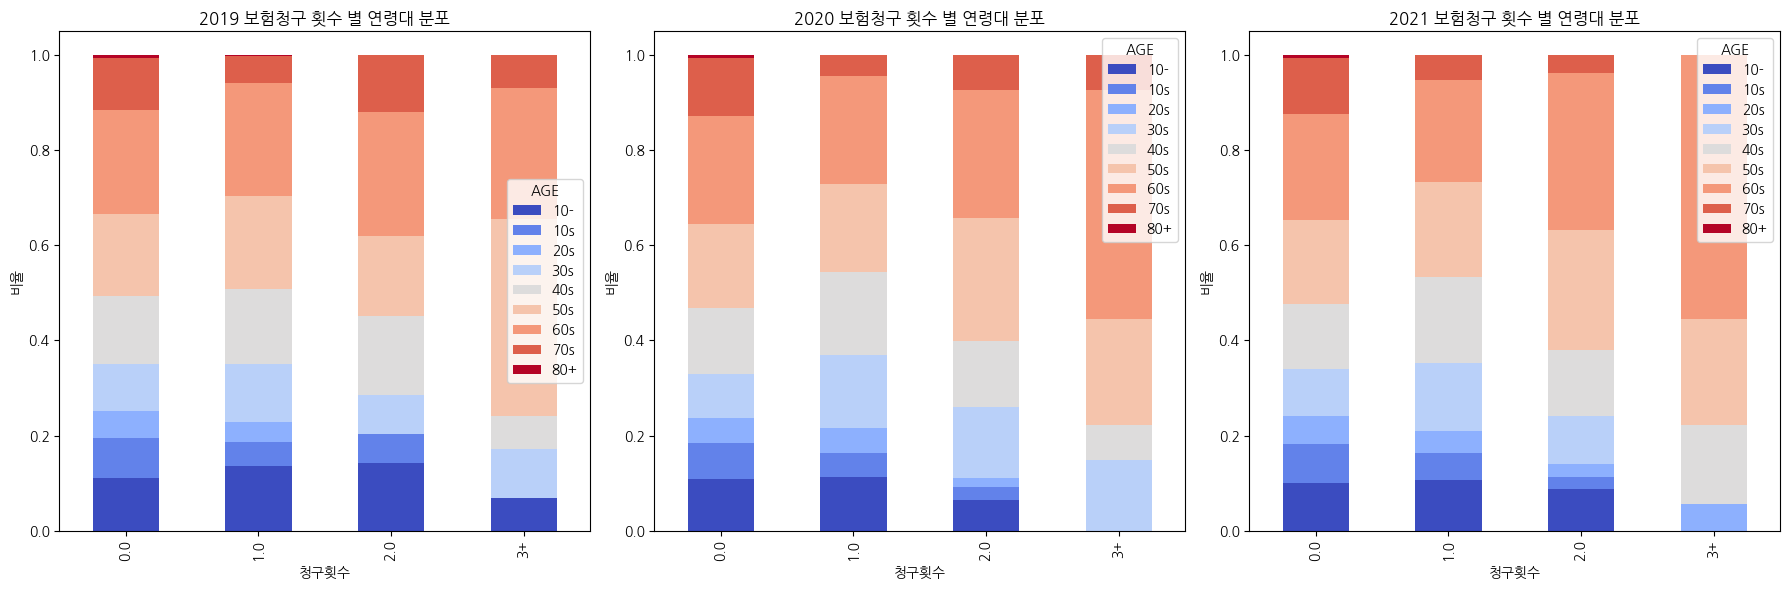

In [108]:
import matplotlib.pyplot as plt

# 2019년 데이터 준비 (나이)
age_2019 = df_2019[['CLAIM_SUM', 'AGE']].copy()

# 2020년 데이터 준비 (나이)
age_2020 = df_2020[['CLAIM_SUM', 'AGE']].copy()

# 2021년 데이터 준비 (나이)
age_2021 = df_2021[['CLAIM_SUM', 'AGE']].copy()

# CLAIM_SUM이 3 이상인 경우 하나의 그룹으로 묶는 함수
def group_claim_sum(df):
    df['CLAIM_SUM'] = df['CLAIM_SUM'].apply(lambda x: '3+' if x >= 3 else str(x))
    return df

# 각 년도별 데이터에 적용
age_2019 = group_claim_sum(age_2019)
age_2020 = group_claim_sum(age_2020)
age_2021 = group_claim_sum(age_2021)

# 1행 3열로 서브플롯 설정
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# 2019년 나이 분포 (실제 값으로 나누어 bar chart)
age_2019_grouped = age_2019.groupby(['CLAIM_SUM', 'AGE']).size().unstack(fill_value=0)
age_2019_grouped = age_2019_grouped.div(age_2019_grouped.sum(axis=1), axis=0)
age_2019_grouped.plot(kind='bar', stacked=True, ax=axes[0], cmap='coolwarm')
axes[0].set_title('2019 보험청구 횟수 별 연령대 분포')
axes[0].set_xlabel('청구횟수')
axes[0].set_ylabel('비율')
axes[0].legend(title='AGE', labels=['10-', '10s','20s','30s','40s','50s','60s','70s','80+'])

# 2020년 나이 분포 (실제 값으로 나누어 bar chart)
age_2020_grouped = age_2020.groupby(['CLAIM_SUM', 'AGE']).size().unstack(fill_value=0)
age_2020_grouped = age_2020_grouped.div(age_2020_grouped.sum(axis=1), axis=0)
age_2020_grouped.plot(kind='bar', stacked=True, ax=axes[1], cmap='coolwarm')
axes[1].set_title('2020 보험청구 횟수 별 연령대 분포')
axes[1].set_xlabel('청구횟수')
axes[1].set_ylabel('비율')
axes[1].legend(title='AGE', labels=['10-', '10s','20s','30s','40s','50s','60s','70s','80+'])

# 2021년 나이 분포 (실제 값으로 나누어 bar chart)
age_2021_grouped = age_2021.groupby(['CLAIM_SUM', 'AGE']).size().unstack(fill_value=0)
age_2021_grouped = age_2021_grouped.div(age_2021_grouped.sum(axis=1), axis=0)
age_2021_grouped.plot(kind='bar', stacked=True, ax=axes[2], cmap='coolwarm')
axes[2].set_title('2021 보험청구 횟수 별 연령대 분포')
axes[2].set_xlabel('청구횟수')
axes[2].set_ylabel('비율')
axes[2].legend(title='AGE', labels=['10-', '10s','20s','30s','40s','50s','60s','70s','80+'])

# 차트 표시
plt.tight_layout()
plt.show()


## 2-1 연령 별 보험청구 횟수 분포

/tmp/ipykernel_24/2995685137.py:33: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(['10-', '10s', '20s', '30s', '40s', '50s', '60s', '70s', '80+'])
/tmp/ipykernel_24/2995685137.py:43: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(['10-', '10s', '20s', '30s', '40s', '50s', '60s', '70+'])
/tmp/ipykernel_24/2995685137.py:53: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[2].set_xticklabels(['10-', '10s', '20s', '30s', '40s', '50s', '60s', '70s', '80+'])


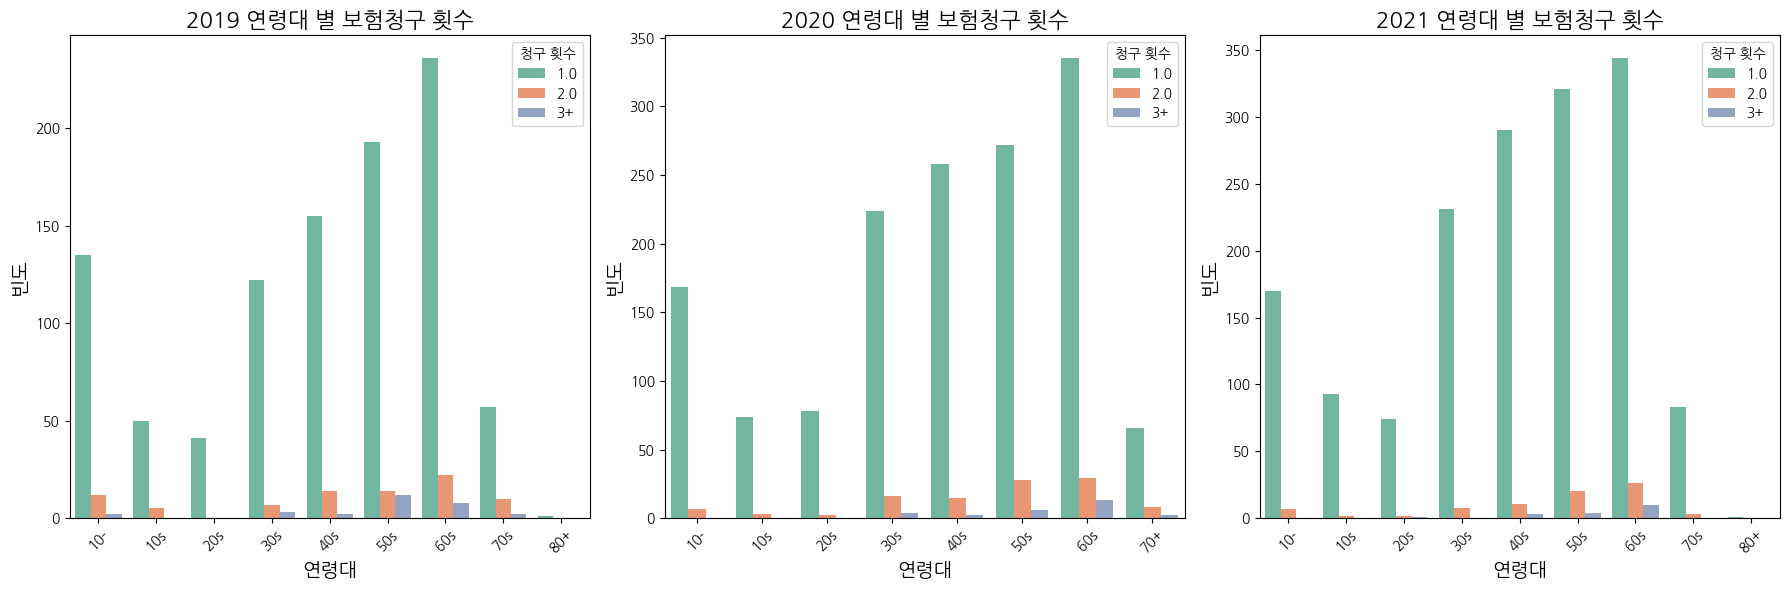

In [109]:
import matplotlib.pyplot as plt
import seaborn as sns

# 2019년, 2020년, 2021년 데이터 준비 (나이)
age_2019 = df_2019[['CLAIM_SUM', 'AGE']].copy()
age_2020 = df_2020[['CLAIM_SUM', 'AGE']].copy()
age_2021 = df_2021[['CLAIM_SUM', 'AGE']].copy()
age_2019 = age_2019[age_2019['CLAIM_SUM']!=0]
age_2020 = age_2020[age_2020['CLAIM_SUM']!=0]
age_2021 = age_2021[age_2021['CLAIM_SUM']!=0]

# CLAIM_SUM이 3 이상인 경우 하나의 그룹으로 묶는 함수
def group_claim_sum(df):
    df['CLAIM_SUM'] = df['CLAIM_SUM'].apply(lambda x: '3+' if x >= 3 else str(x))
    return df

# 각 년도별 데이터에 적용
age_2019 = group_claim_sum(age_2019)
age_2020 = group_claim_sum(age_2020)
age_2021 = group_claim_sum(age_2021)

# 1행 3열로 서브플롯 설정
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# 2019년 데이터
claim_counts_2019 = age_2019.groupby(['AGE', 'CLAIM_SUM']).size().reset_index(name='COUNT')
sns.barplot(data=claim_counts_2019, x='AGE', y='COUNT', hue='CLAIM_SUM', palette='Set2', ax=axes[0])
axes[0].set_title('2019 연령대 별 보험청구 횟수', fontsize=16)
axes[0].set_xlabel('연령대', fontsize=14)
axes[0].set_ylabel('빈도', fontsize=14)
axes[0].legend(title='청구 횟수')
axes[0].tick_params(axis='x', rotation=45)
axes[0].set_xticklabels(['10-', '10s', '20s', '30s', '40s', '50s', '60s', '70s', '80+'])

# 2020년 데이터
claim_counts_2020 = age_2020.groupby(['AGE', 'CLAIM_SUM']).size().reset_index(name='COUNT')
sns.barplot(data=claim_counts_2020, x='AGE', y='COUNT', hue='CLAIM_SUM', palette='Set2', ax=axes[1])
axes[1].set_title('2020 연령대 별 보험청구 횟수', fontsize=16)
axes[1].set_xlabel('연령대', fontsize=14)
axes[1].set_ylabel('빈도', fontsize=14)
axes[1].legend(title='청구 횟수')
axes[1].tick_params(axis='x', rotation=45)
axes[1].set_xticklabels(['10-', '10s', '20s', '30s', '40s', '50s', '60s', '70+'])

# 2021년 데이터
claim_counts_2021 = age_2021.groupby(['AGE', 'CLAIM_SUM']).size().reset_index(name='COUNT')
sns.barplot(data=claim_counts_2021, x='AGE', y='COUNT', hue='CLAIM_SUM', palette='Set2', ax=axes[2])
axes[2].set_title('2021 연령대 별 보험청구 횟수', fontsize=16)
axes[2].set_xlabel('연령대', fontsize=14)
axes[2].set_ylabel('빈도', fontsize=14)
axes[2].legend(title='청구 횟수')
axes[2].tick_params(axis='x', rotation=45)
axes[2].set_xticklabels(['10-', '10s', '20s', '30s', '40s', '50s', '60s', '70s', '80+'])

# 차트 표시
plt.tight_layout()
plt.show()


## 3. 보험 청구 횟수 별 건강정보 이해능력 분포

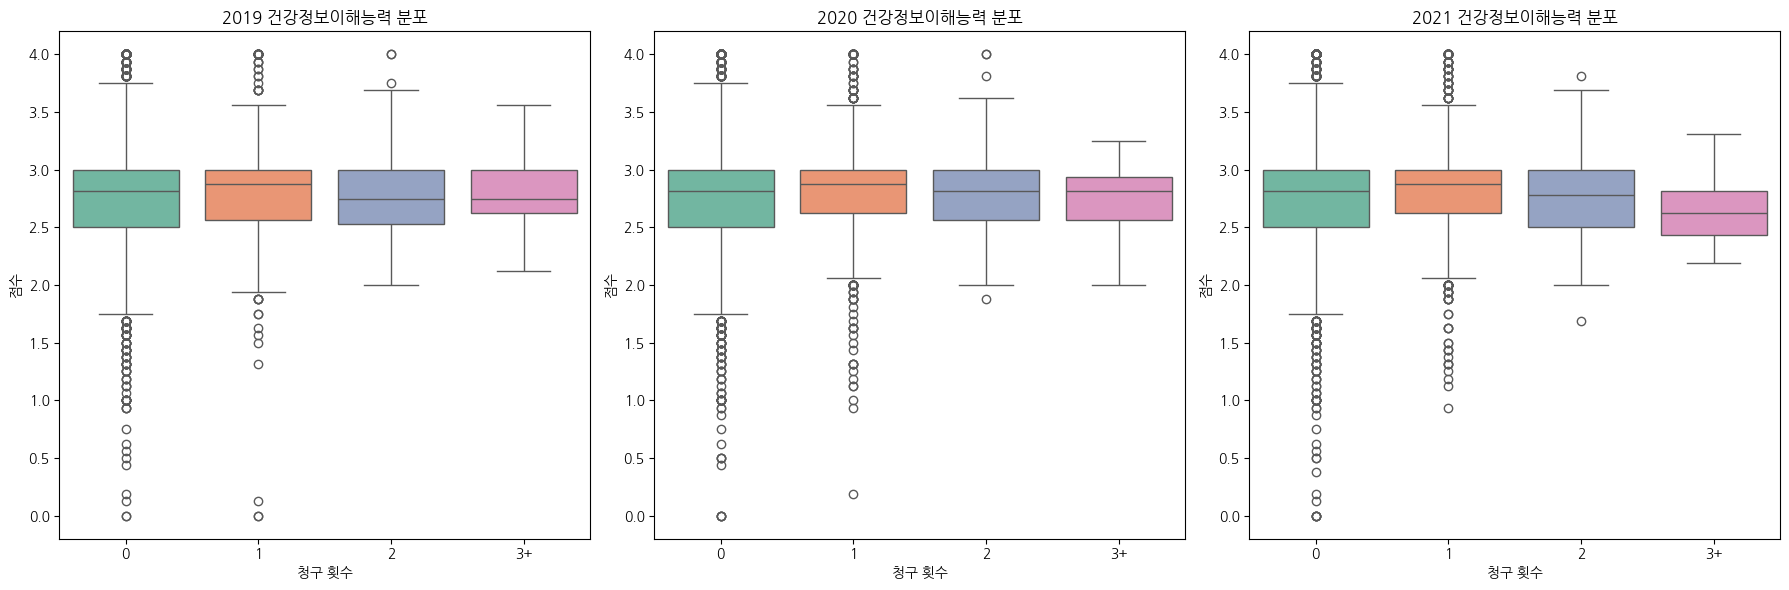

In [110]:
# CLAIM_SUM이 3 이상인 경우 하나의 그룹으로 묶는 함수
def group_claim_sum(df):
    # CLAIM_SUM을 숫자형으로 변환하고, 4 이상은 '4+'로 그룹화
    df['CLAIM_SUM'] = df['CLAIM_SUM'].astype(int).apply(lambda x: '3+' if x >= 3 else str(x))
    return df

# 2019년 데이터 준비 (건강정보이해능력 상태)
hlit_stat_2019 = df_2019[['CLAIM_SUM', 'HLIT']].copy()
# 2020년 데이터 준비 (건강정보이해능력 상태)
hlit_stat_2020 = df_2020[['CLAIM_SUM', 'HLIT']].copy()
# 2021년 데이터 준비 (건강정보이해능력 상태)
hlit_stat_2021 = df_2021[['CLAIM_SUM', 'HLIT']].copy()

# 각 년도별 데이터에 적용
hlit_stat_2019 = group_claim_sum(hlit_stat_2019)
hlit_stat_2020 = group_claim_sum(hlit_stat_2020)
hlit_stat_2021 = group_claim_sum(hlit_stat_2021)

# CLAIM_SUM의 순서를 지정 (0, 1, 2, 3, '4+')
claim_order = ['0', '1', '2', '3+']

# 1행 3열로 서브플롯 설정
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# 2019년 박스플롯
sns.boxplot(x='CLAIM_SUM', y='HLIT', data=hlit_stat_2019, ax=axes[0], palette="Set2", hue=None, order=claim_order)
axes[0].set_title('2019 건강정보이해능력 분포')
axes[0].set_xlabel('청구 횟수')
axes[0].set_ylabel('점수')

# 2020년 박스플롯
sns.boxplot(x='CLAIM_SUM', y='HLIT', data=hlit_stat_2020, ax=axes[1], palette="Set2", hue=None, order=claim_order)
axes[1].set_title('2020 건강정보이해능력 분포')
axes[1].set_xlabel('청구 횟수')
axes[1].set_ylabel('점수')

# 2021년 박스플롯
sns.boxplot(x='CLAIM_SUM', y='HLIT', data=hlit_stat_2021, ax=axes[2], palette="Set2", hue=None, order=claim_order)
axes[2].set_title('2021 건강정보이해능력 분포')
axes[2].set_xlabel('청구 횟수')
axes[2].set_ylabel('점수')

# 차트 표시
plt.tight_layout()
plt.show()

## 4. 의료시설 이용 횟수 대비 보험 청구 횟수 별 건강정보 이해능력 분포

/tmp/ipykernel_24/338155485.py:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='MS_CLAIM_RATIO', y='HLIT', data=df_2019, palette="coolwarm")


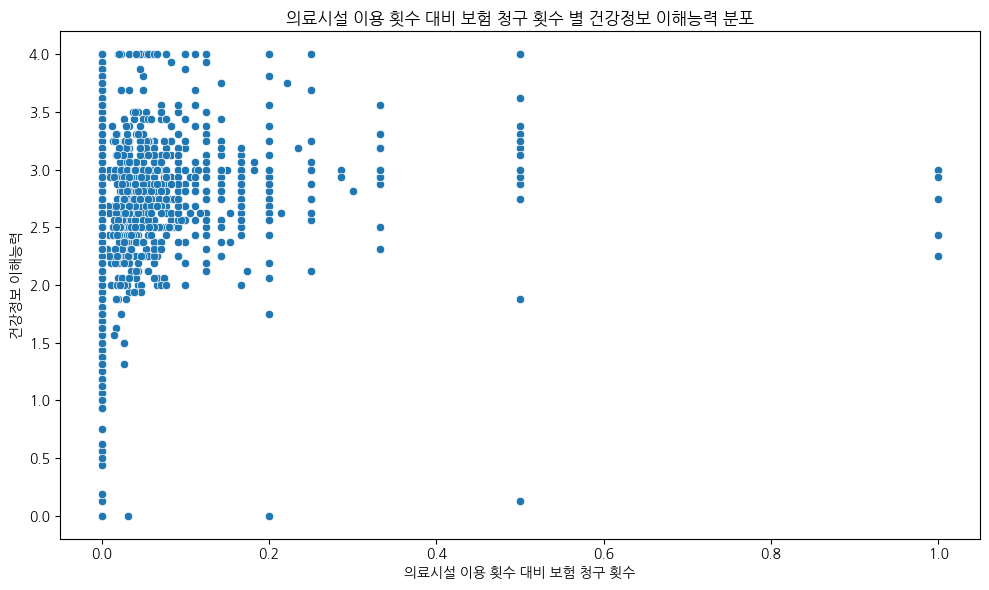

In [126]:
# 산점도

plt.figure(figsize=(10, 6))
sns.scatterplot(x='MS_CLAIM_RATIO', y='HLIT', data=df_2019, palette="coolwarm")
plt.title('의료시설 이용 횟수 대비 보험 청구 횟수 별 건강정보 이해능력 분포')
plt.xlabel('의료시설 이용 횟수 대비 보험 청구 횟수')
plt.ylabel('건강정보 이해능력')
plt.tight_layout()
plt.show()